# Machine Learning : Projet Real Estate

### Tree and Random Forest

##### Membres : Zakaria Kabara - Valentin Lhote - Omar Mousteau - Marijan Sorić

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#import tensorflow as tf
import random
from sklearn.impute import KNNImputer
from tqdm import tqdm

In [2]:
X_train = pd.read_csv('X_train_J01Z4CN.csv')
Xfinal = pd.read_csv('X_test_BEhvxAN.csv')
y_train = pd.read_csv('y_train_OXxrJt1.csv')
X_train.shape

(37368, 27)

In [3]:
Xfinal

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35160615,maison,49.371670,3.533991,brenelle,2220,143.0,NaN,800.0,299.0,...,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35830639,propriété,49.037190,-0.982385,torigni-sur-vire,50160,470.0,NaN,28559.0,NaN,...,0.0,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,36016657,appartement,47.097180,6.149253,ornans,25290,135.0,NaN,NaN,NaN,...,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,35759225,appartement,43.699670,7.245556,nice,6000,3637.0,3.0,NaN,210.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35252229,divers,43.849435,6.215461,moustiers-sainte-marie,4360,600.0,NaN,NaN,NaN,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9334,36052217,villa,43.117121,5.790808,sanary-sur-mer,83110,96.0,NaN,NaN,NaN,...,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9335,35823719,appartement,43.099598,5.874048,la-seyne-sur-mer,83500,71.0,3.0,NaN,51.0,...,0.0,1.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9336,35793053,appartement,45.977895,-1.096506,fouras,17450,70.0,NaN,NaN,NaN,...,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9337,36049283,maison,47.284067,-2.197979,saint-nazaire,44600,120.0,NaN,362.0,65.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
id_test = list(Xfinal['id_annonce'])

In [5]:
X_train=pd.concat([X_train, Xfinal], axis=0)

In [6]:
"""Création d'un unique dataframe combinant les prix et les attributs de chaque bien"""
df=X_train.copy()
#df.insert(1, 'price', y_train['price'])
df

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9334,36052217,villa,43.117121,5.790808,sanary-sur-mer,83110,96.0,NaN,NaN,NaN,...,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9335,35823719,appartement,43.099598,5.874048,la-seyne-sur-mer,83500,71.0,3.0,NaN,51.0,...,0.0,1.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9336,35793053,appartement,45.977895,-1.096506,fouras,17450,70.0,NaN,NaN,NaN,...,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9337,36049283,maison,47.284067,-2.197979,saint-nazaire,44600,120.0,NaN,362.0,65.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing

On enlève les paramètres que l'on juge moins utiles (on va utiliser lat et long au lieu de la ville/code postal).

In [7]:
#df.drop(columns=['postal_code','city','energy_performance_category','ghg_category','exposition','nb_photos','energy_performance_value','ghg_value'], inplace=True)
df.drop(columns=['postal_code','energy_performance_category','ghg_category','exposition','energy_performance_value','ghg_value'], inplace=True)

In [8]:
liste=list(df['property_type'].unique())
for x in liste:
    print(df[(df['property_type']==x)].nb_bathrooms.dropna().mean(),x)

1.000162074554295 appartement
1.0 maison
1.0142450142450143 propriété
1.0 divers
1.0 duplex
0.01038961038961039 terrain
1.0 villa
1.0 viager
0.0 terrain à bâtir
1.0 ferme
0.008130081300813009 parking
1.0 moulin
1.0 loft
1.0 manoir
1.0434782608695652 chalet
1.1666666666666667 péniche
1.0 atelier
1.0 château
1.0 chambre
1.0 gîte
1.0 hôtel particulier
nan hôtel


On fixe l'étage à 0 pour les biens autres que des appartements :
On fixe le land_size de certains biens à la size 0.
On choisit, pour les biens où le nombre de salles de bains n'est pas spécifié, de fixer ce nombre à 1 ou à 0.

In [9]:
# floor
df[df['property_type']!="appartement"]=df[df['property_type']!="appartement"].assign(floor=0.0)
df[df['property_type']!="appartement"].loc[:,'floor']

# land_size
#Pour certains bien, les, on met land_size=0
land_size_prop = ['appartement','duplex', 'loft', 'atelier','chambre']
for property_type in land_size_prop:
    df.loc[df['property_type']==property_type,'land_size']=df.loc[df['property_type']==property_type,'land_size'].fillna(0.0)

# nb_bathrooms
for x in liste:
    if x not in ['terrain','terrain à bâtir','parking','hotel']:
        df.loc[df['property_type']==x,'nb_bathrooms']=df.loc[df['property_type']==x,'nb_bathrooms'].fillna(1)
    elif x== 'hotel':
         df.loc[df['property_type']==x,'nb_bathrooms']=df.loc[df['property_type']==x,'nb_bathrooms'].fillna(70)
    else:
        df.loc[df['property_type']==x,'nb_bathrooms']=df.loc[df['property_type']==x,'nb_bathrooms'].fillna(0)
        

<AxesSubplot: >

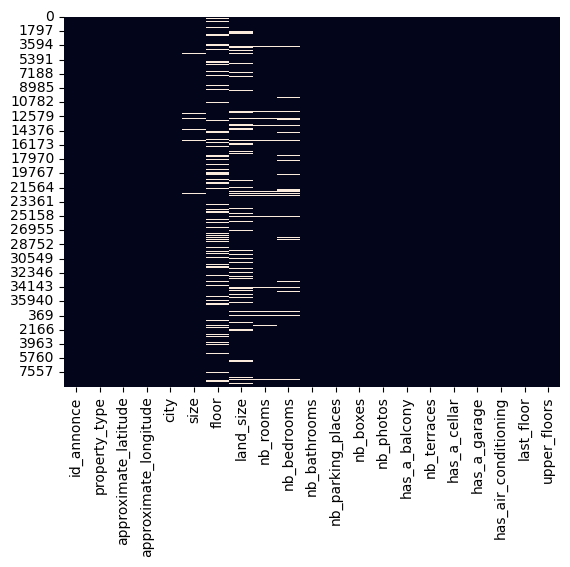

In [10]:
sns.heatmap(df.isna(),cbar=False)

In [11]:
print((df[df['property_type']=="appartement"].isna().sum()*100/df[df['property_type']=="appartement"].shape[0]).sort_values(ascending=True))
print((df.isna().sum()*100/df.shape[0]).sort_values(ascending=True))

id_annonce                0.000000
has_air_conditioning      0.000000
has_a_garage              0.000000
has_a_cellar              0.000000
nb_terraces               0.000000
has_a_balcony             0.000000
nb_photos                 0.000000
nb_boxes                  0.000000
nb_parking_places         0.000000
last_floor                0.000000
nb_bathrooms              0.000000
land_size                 0.000000
city                      0.000000
approximate_longitude     0.000000
approximate_latitude      0.000000
property_type             0.000000
upper_floors              0.000000
nb_rooms                  0.360095
size                      0.669473
nb_bedrooms               7.064969
floor                    38.971446
dtype: float64
id_annonce                0.000000
has_air_conditioning      0.000000
has_a_garage              0.000000
has_a_cellar              0.000000
nb_terraces               0.000000
has_a_balcony             0.000000
nb_photos                 0.000000
nb_bo

(Peut-être ajouter d'autres spécificités sur la moyenne)

### Encodage

In [13]:
# # calculer la matrice de corrélation et extraire la colonne "price"
# corr_price = df.corr()['price']

# # trier les corrélations par ordre croissant
# corr_price_sorted = corr_price.sort_values(ascending=False)

# # afficher les corrélations triées
# print(corr_price_sorted)

<AxesSubplot: >

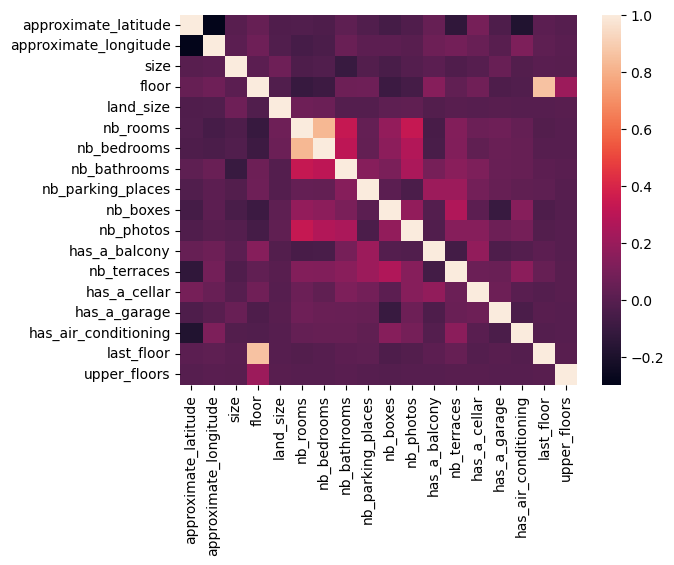

In [14]:
sns.heatmap(df.corr())

On encode les valeurs de type de propriété :

In [15]:
df=pd.get_dummies(df,columns=['property_type'])

On encode les villes par fréquence

In [16]:
fq=df.groupby(['city']).size()/len(df)
df.loc[:,"{}_freq_encode".format('city')]=df['city'].map(fq)
df.drop(['city'],axis=1, inplace=True)
df.rename(columns={'city_freq_encode':"city"}, inplace=True)

In [17]:
df.columns

Index(['approximate_latitude', 'approximate_longitude', 'size', 'floor',
       'land_size', 'nb_rooms', 'nb_bedrooms', 'nb_bathrooms',
       'nb_parking_places', 'nb_boxes', 'nb_photos', 'has_a_balcony',
       'nb_terraces', 'has_a_cellar', 'has_a_garage', 'has_air_conditioning',
       'last_floor', 'upper_floors', 'property_type_appartement',
       'property_type_atelier', 'property_type_chalet',
       'property_type_chambre', 'property_type_château',
       'property_type_divers', 'property_type_duplex', 'property_type_ferme',
       'property_type_gîte', 'property_type_hôtel',
       'property_type_hôtel particulier', 'property_type_loft',
       'property_type_maison', 'property_type_manoir', 'property_type_moulin',
       'property_type_parking', 'property_type_propriété',
       'property_type_péniche', 'property_type_terrain',
       'property_type_terrain à bâtir', 'property_type_viager',
       'property_type_villa', 'city'],
      dtype='object')

In [18]:
df.dtypes

approximate_latitude               float64
approximate_longitude              float64
size                               float64
floor                              float64
land_size                          float64
nb_rooms                           float64
nb_bedrooms                        float64
nb_bathrooms                       float64
nb_parking_places                  float64
nb_boxes                           float64
nb_photos                          float64
has_a_balcony                      float64
nb_terraces                        float64
has_a_cellar                       float64
has_a_garage                       float64
has_air_conditioning               float64
last_floor                         float64
upper_floors                       float64
property_type_appartement            uint8
property_type_atelier                uint8
property_type_chalet                 uint8
property_type_chambre                uint8
property_type_château                uint8
property_ty

In [19]:
# K-NN sur l'ensemble des données
for i in tqdm(range(1000)):
    imputer = KNNImputer(n_neighbors=5)
    imputer.fit_transform(df)
    df=df.fillna(df.mean())

100%|█████████████████████████████████████████████████████| 1000/1000 [03:54<00:00,  4.27it/s]


In [20]:
# df = X_train et y_train
Xfinal = df.loc[id_test]
df.drop(index=id_test, inplace=True)

In [21]:
Xfinal

,approximate_latitude,approximate_longitude,size,floor,land_size,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,...,property_type_manoir,property_type_moulin,property_type_parking,property_type_propriété,property_type_péniche,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa,city
id_annonce,,,,,,,,,,,,,,,,,,,,,
35160615,49.371670,3.533991,143.0,0.000000,800.000000,5.00000,4.000000,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0.000021
35830639,49.037190,-0.982385,470.0,0.000000,28559.000000,25.00000,10.000000,1.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0.000086
36016657,47.097180,6.149253,135.0,1.063219,0.000000,5.00000,3.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000021
35759225,43.699670,7.245556,3637.0,3.000000,0.000000,2.00000,1.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.006038
35252229,43.849435,6.215461,600.0,0.000000,1985.906328,4.24813,2.869428,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36052217,43.117121,5.790808,96.0,0.000000,1985.906328,4.00000,3.000000,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0.001584
35823719,43.099598,5.874048,71.0,3.000000,0.000000,3.00000,2.000000,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0.001434
35793053,45.977895,-1.096506,70.0,1.063219,0.000000,3.00000,2.000000,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000193


In [22]:
""" % de NaN par colonne du dtf total"""
(df.isna().sum()*100/df.shape[0]).mean()

0.0

# Normaliser:

In [23]:
## Normalisation uniforme
#from sklearn.preprocessing import MinMaxScaler
# instancier l'objet scaler
#scaler = MinMaxScaler()

# normaliser les colonnes du dataframe
#DF = pd.DataFrame(scaler.fit_transform(Xfinal.drop('property_type', axis=1)), columns=Xfinal.drop('property_type', axis=1).columns.tolist()).set_index(Xfinal.index)


## Modèles :

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

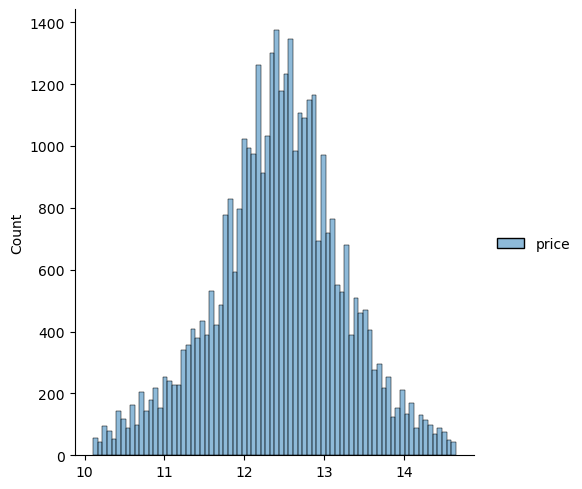

In [25]:
#X = df.drop(columns=['price'])
X=df
y = y_train.copy()
y.set_index('id_annonce', inplace=True)
y = np.log(y)
sns.displot(y,label='log(price)')

In [26]:
X.shape, y.shape, Xfinal.shape

((37368, 41), (37368, 1), (9339, 41))

In [27]:
X

,approximate_latitude,approximate_longitude,size,floor,land_size,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,...,property_type_manoir,property_type_moulin,property_type_parking,property_type_propriété,property_type_péniche,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa,city
id_annonce,,,,,,,,,,,,,,,,,,,,,
35996577,43.643880,7.117183,63.0,1.063219,0.0,3.0,2.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000835
35811033,45.695757,4.895610,90.0,3.000000,0.0,5.0,4.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.001071
35731841,47.966791,-1.220451,61.0,0.000000,370.0,2.0,1.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000043
35886765,47.289292,-1.878805,142.0,0.000000,764.0,4.0,3.000000,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0.000021
35781137,45.718992,4.844234,88.0,3.000000,0.0,4.0,3.000000,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0.000300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881571,43.480292,-1.484324,2995.0,1.063219,0.0,1.0,2.869428,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.001434
35890109,48.861391,2.401158,36.0,4.000000,0.0,2.0,1.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.002441
36010245,44.397837,-1.164312,99.0,2.000000,0.0,4.0,3.000000,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000407


In [28]:
## Normalisation z score
scaler=RobustScaler()
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X),index=X.index,columns=X.columns)
Xfinal=pd.DataFrame(scaler.transform(Xfinal),index=Xfinal.index,columns=Xfinal.columns)

In [34]:
X.to_csv('X_train.csv', index=True)
Xfinal.to_csv('X_test.csv', index=True)
y.to_csv('y_test.csv', index=True)

In [30]:
# Sélection des 10 meilleures caractéristiques
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)

# Affichage des noms des colonnes sélectionnées
feature_names = list(X.columns[selector.get_support()])
print(feature_names)

['nb_rooms', 'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places', 'nb_photos', 'nb_terraces', 'property_type_appartement', 'property_type_terrain', 'property_type_terrain à bâtir', 'city']


/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# On split les données
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# métriques
from sklearn.metrics import mean_absolute_percentage_error
def custom_metric_function(y_true, y_pred):
    return mean_absolute_percentage_error(np.exp(y_true), np.exp(y_pred))*100

from sklearn.metrics import make_scorer
custom_score=make_scorer(custom_metric_function, greater_is_better=False)

# Comparaison Modèles

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae
#from lightgbm import LGBMRegressor

#commentés lorsqu'ils sont longs à train pour la boucle en dessous
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('ADA', AdaBoostRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))]
            #("LightGBM", LGBMRegressor())]
    

for name, regressor in models:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    error = custom_metric_function(y_test, y_pred)
    print('Score for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

ModuleNotFoundError: No module named 'xgboost'

### Exemple de modèle simple

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred_ = model.predict(X_test)

In [ ]:
print(custom_metric_function((y_test), (y_pred_)),'pourcentage d erreurs')

In [ ]:
plt.figure(figsize=(8, 6))
#xgb.plot_importance(xgbr, importance_type='gain')

# Extraire les 10 variables les plus importantes
importance = model.feature_importances_
indices = importance.argsort()[-10:][::-1]
top_10_names = [X_train.columns[i] for i in indices]
top_10_importance = importance[indices]

# Afficher l'importance des 10 variables les plus importantes
plt.figure(figsize=(8, 6))
plt.barh(range(len(top_10_importance)), top_10_importance, align='center')
plt.yticks(range(len(top_10_importance)), top_10_names)
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('10 Variables les plus importantes')
plt.show()

### XGB

In [33]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
# test Marijan
params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.1,0.2,0.3,0.4,0.5],
        #   'n_estimators': [300,400],
          #  'seed':[5,10,20]}
          'min_split_loss' : [0, 0.3,0.5,0.7],
          'subsample' : [0.4,0.5,0.6,0.8,1]}
""""parametres={'learning_rate': 0.07, 'max_depth': 13, 'n_estimators': 400, 'seed': 10}"""
"""{'learning_rate': 0.08, 'max_depth': 13, 'n_estimators': 400, 'seed': 5}"""
#xgbr = xgb.XGBRegressor(learning_rate= 0.08, max_depth= 13, n_estimators= 400, seed=5)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring=custom_score, 
                   verbose=1,
                  cv=4)


# clf = RandomizedSearchCV(estimator=xgbr, 
#                    param_distributions=params,
#                    scoring=custom_score, 
#                    verbose=1,
#                    cv=4,
#                    n_iter=100)


xgbr.fit(X_train, y_train)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#clf.best_params_

In [ ]:
y_pred=clf.best_estimator_.predict(X_test)
y_pred=xgbr.predict(X_test)
print('Score challenge=',custom_metric_function(y_test, y_pred))
print('R2=',r2_score(y_test,y_pred))

### Rendre la solution

On appelle modèle le modèle final, hyper-paramétré. 

In [ ]:
# On l'entraîne sur la totalité du jeu d'entraînement (X,y)
model=xgbr
model.fit(X,y)

# Prédiction finale sur le X test
y_pred_final= model.predict(Xfinal)

# Attention il faut bien passer au log avant de donner la solution
y_pred_final = np.exp(y_pred_final)


In [ ]:
sns.displot(y_pred_final)

In [ ]:
pd.DataFrame(y_pred_final)

In [ ]:
#On enregistre en .csv
y_pred_final=pd.DataFrame(y_pred_final)
y_pred_final.to_csv('y_solution3-ms.csv',index=True, decimal=',')

### Random Forests

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# random_forest = RandomForestRegressor()
# random_forest.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import mean_absolute_percentage_error

# def custom_metric_function(y_true, y_pred):
#     return mean_absolute_percentage_error(y_true, y_pred)*100

# print(custom_metric_function(y_test, y_pred))

#### Random Forest with Best Params

In [ ]:
# #The number of trees in the forest.
# #parameters = {'n_estimators' : [25,50,100,200]} # Devient très long pour plus de 200
# parameters={'bootstrap': [True, False],
#  'criterion' : ['absolute_error'],
#  'max_depth': [10, 50,  100, None],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [50, 100, 200]}

In [ ]:
# random_forest_1 = RandomForestRegressor()
# grid = GridSearchCV(random_forest_1, parameters)

# grid.fit(X_train, y_train)

### XGBoost

In [ ]:
#pip install xgboost

In [ ]:
# #from xgboost import XGBRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_percentage_error

# def custom_metric_function(y_true, y_pred):
#     return mean_absolute_percentage_error(np.exp(y_true), np.exp(y_pred))*100

# XGB = GradientBoostingRegressor()
# XGB.fit(X_train, y_train)
# y_pred = XGB.predict(X_test)
# error = custom_metric_function(y_test, y_pred)
# print('Score : '+error*100+'%')

In [ ]:
# y_train.to_csv('my_data.csv', index=True)

In [ ]:
# X_train=pd.DataFrame(X_train, dtype='float64')

In [ ]:
# import xgboost as xgb
# params = { 'max_depth': [3,6,10],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 200, 300],
#            'colsample_bytree': [0.3, 0.7]}
# xgbr = xgb.XGBRegressor(seed = 20)
# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)
# clf.fit(X_train, y_train)


In [ ]:
# y_pred = clf.predict(X_test)
# print('mean absolute error =',mae(y_test, y_pred))
# print('r2 score =', r2_score(y_test, y_pred))

In [ ]:
# clf.best_params_

In [ ]:
# y_pred=clf.best_estimator_.predict(X_test)

# print(custom_metric_function(y_test, y_pred))